# lecture 0 - 양자컴퓨터를 위한 선형대수와 양자 역학 

## 0-0 선형대수학

### 복소수의 특징

복소수는 실수인 $a$와 $b$가 있고 $i^2 = -1$을 만족하는 허수 $i$가 있을 때, $z = a + bi$ 형태로 표현되는 수를 의미합니다. 복소수는 실수처럼, 덧셈, 뺄샘, 곱셈, 나눗셈이 가능합니다.

아래의 셀을 실행시켜 아주 간단한 복소수의 덧셈과 곱셈을 해봅시다.


In [1]:
a = 2 + 3j
b = 5 - 2j
print("a + b=", a+b)
print("a * b=", a*b)

a + b= (7+1j)
a * b= (16+11j)


곱셈의 과정을 잠시 자세히 살펴보겠습니다. 
$$(2 + 3i)\times(5 - 2i) = (2\times5 + 2\times(-2i) + 3i\times5 + 3i\times(-2i)) = 10 - 4i + 15i - 6i^2 = 10 - 4i + 15i + 6 = 16 + 11i $$

복소수는 켤레복소수(Complex Conjugate)라 부르는 특별한 짝을 정의해 사용하곤 합니다. 복소수 $z = a + bi$의 켤레복소수는 일반적으로 $\bar z$로 표현하며 그 값은 $\bar z = a - bi$와 같습니다. 복소수와 켤레복소수가 덧셈과 곱셈에서 갖는 특별한 성질을 다음 셀에서 확인해 봅시다.

In [2]:
a = 2 + 3j
a_bar = 2 - 3j
print("a + a_bar = ", a + a_bar)
print("a * a_bar = ", a * a_bar)

a + a_bar =  (4+0j)
a * a_bar =  (13+0j)


복소수와 켤레복소수를 더하거나 곱하면 그 결과는 실수가 됩니다. 

복소수는 복소수의 **길이**라고도 불리는 절대값(modulus, $|z|$)를 갖습니다. 복소수의 절대값은 좌표평면에서 x축을 실수축으로, y축을 허수축으로 잡았을때 원점에서부터 복소수까지의 **거리**에 해당하는 양(positive)의　실수(real)값 입니다. 아래의 노트북은 $z = 3 + 4i$의 절대값을 좌표평면에 그려본 것입니다. 우리가 잘 알듯이 이 복소수의 절대값은 $5 = \sqrt{3^2 + 4^2}$입니다.

복소수의 절대값을 계산하는데 켤레복소수가 유용하게 쓰이곤 하는데 $|z|^2 = z \times \bar z$를 만족하며 아주 간단히 다음과 같이 증명이 가능합니다. $$(a + bi)(a - bi) = a^2 -abi +abi -b^2i^2 = a^2 + b^2$$

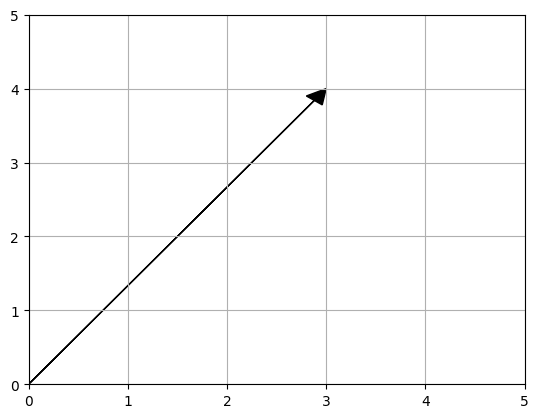

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

z1 = 3 + 4j

x_min = 0
x_max = 5.0

y_min = 0
y_max = 5.0

def plot_complex_number_geometric_representation(z,x_min,x_max,y_min,y_max):

    fig = plt.figure()

    ax = plt.gca()

    a = [0.0,0.0]
    b = [z.real,z.imag]

    head_length = 0.2

    dx = b[0] - a[0]
    dy = b[1] - a[1]

    vec_ab = [dx,dy]

    vec_ab_magnitude = math.sqrt(dx**2+dy**2)

    dx = dx / vec_ab_magnitude
    dy = dy / vec_ab_magnitude

    vec_ab_magnitude = vec_ab_magnitude - head_length

    ax.arrow(a[0], a[1], vec_ab_magnitude*dx, vec_ab_magnitude*dy, head_width=head_length, head_length=head_length, fc='black', ec='black')

    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

    plt.grid(True,linestyle='-')

    plt.show()


plot_complex_number_geometric_representation(z1,x_min,x_max,y_min,y_max)

위에 간단하게 언급된 복소수의 성질들을 종합하면 다음과 같은 복소수의 일반적인 성질들을 얻을 수 있습니다. 여기에서 $z$와 $w$는 임의의 복소수 입니다.
$$ z + w = w + z$$
$$ zw = wz$$
$$ \overline{z + w} = \bar z + \bar w$$
$$ \overline{zw} = \bar z \bar w$$
$$ z\bar z = \bar z z = |z|^2$$
$$ \bar{\bar z} = z$$
$$ |z| = |\bar z|$$
$$ |zw| = |z||w|$$
$$ |z + w| \leq |z| + |w| （삼각부등식) $$
$$ z^{-1} = \frac{\bar z}{|z|^2}$$

### 복소수의 표현 - 오일러의 공식과 극좌표계

지금까지 복소수를 $a + bi$의 형태로 표현해 왔지만 복소수를 표현하는 다른 방식도 함께 알아보도록 하겠습니다. 오일러 공식(Euler's formula)은 수학자 레온하르트 오일러의 이름이 붙은 공식으로, 삼각함수와 지수함수에 대한 관계를 나타냅니다. 실수이면서 [라디안](https://ko.wikipedia.org/wiki/%EB%9D%BC%EB%94%94%EC%95%88)인 $\theta$가 있을때 다음의 공식이 만족되며 이를 오일러의 공식이라 부릅니다.
$$e^{i\theta} = cos\theta + i sin\theta$$

오일러의 공식을 활용하면 복소수를 극좌표계를 사용해 표현할 수 있으며 다음을 만족합니다.
$$z = a + bi = |z|e^{i\theta} = |z|(cos\theta + i sin\theta) = |z|cos\theta + i|z|sin\theta$$
$$\therefore a = |z|cos\theta,  b=|z|sin\theta, tan\theta = \frac{b}{a},  \theta = \arctan\frac{b}{a}$$

이때, $\theta$는 [복소수의 편각(argument of complex number)](https://ko.wikipedia.org/wiki/%ED%8E%B8%EA%B0%81_(%EC%88%98%ED%95%99))이라 불리며 복소수가 실수와 허수를 좌표축으로 갖는 복소수 평면에서 실수축과 복소수 사이의 각도의 크기를 뜻합니다.

![출처 위키피디아](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Complex_number_illustration_modarg.svg/440px-Complex_number_illustration_modarg.svg.png)

위키피디아에서 가져온 위의 이미지에서 $r = |z|$이며 $\phi = \theta$입니다.

참고로 복소수의 켤레복소는 극좌표계로 $\bar z = e^{-i\theta}$와 같습니다. 복소수의 극좌표계 표현의 일반적인 특성은 다음과 같습니다. $z = |z|e^{i\theta}$와 $w = |w|e^{i\phi}$는 모두 복소수입니다.

$$zw = |z||w|e^{i\theta}e^{i\phi} = |z||w|e^{i(\theta + \phi)}$$
$$\frac{1}{e^{i\theta}} = e^{-i\theta} = \overline{e^{i\theta}}$$
$$e^{\pm2\pi i} = cos(\pm2\pi)+isin(\pm2\pi) = 1, \therefore    ei^{(\theta \pm2\pi)} = e^{i\theta}e^{\pm2\pi i} = e^{i\theta}$$


### 벡터

[벡터](https://ko.wikipedia.org/wiki/%EB%B2%A1%ED%84%B0)에 대한 가장 간단한 설명은 **"벡터는 크기와 방향을 가진 양이다"** 입니다. 다소 복잡한 설명은 [위키](https://ko.wikipedia.org/wiki/%EB%B2%A1%ED%84%B0)를 참고하세요. 

일반적으로 벡터는 '행(row)'과 '열(column)'로 표현하며 차원(dimension)을 갖습니다. 예를 들어 봅시다. 
$$A =
 \begin{pmatrix}
  1, & 2 
 \end{pmatrix}$$
 
 $$B =
 \begin{pmatrix}
  3 \\
  2\\
  1
 \end{pmatrix}$$

A는 2차원의 행벡터이고, B는 3차원의 열벡터입니다. 우리가 벡터라고 부르는 것은 일반적으로 **열벡터**이며 n차원의 벡터$\vec{v}$는 다음과 같이 표현할 수 있습니다.
 $$\vec{v} =
 \begin{pmatrix}
  v_1 \\
  v_2 \\
  \dots \\
  v_n
 \end{pmatrix}$$
 
 벡터도 숫자와 마찬가지로 덧셈, 뺄셈, 곱셈, 나눗셈이 가능합니다. 여기에서 벡터의 덧셈과 곱셈에 대해 살펴보도록 합시다. 벡터의 합은 다음과 같습니다.
 $$ 
 \begin{pmatrix}
  a_1 \\
  a_2\\
  a_3
 \end{pmatrix}+
  \begin{pmatrix}
  b_1 \\
  b_2\\
  b_3
 \end{pmatrix}=
  \begin{pmatrix}
  a_1 + b_1 \\
  a_2 + b_2\\
  a_3 + b_3
 \end{pmatrix}$$
 
 자주 사용하게 될 표현을 짚어보고 다음으로 넘어가도록 하겠습니다. 만약 벡터의 합에서 $j$번째 행의 요소들만을 언급하고 싶을때는 다음과 같이 간결하게 사용합니다. $$(\vec{v} + \vec{w})_j = v_j + w_j$$

만약 더하고자 하는 두 벡터의 모양과 차원이 다르다면 어떻게 될까요? 원칙적으로 두 벡터의 모양이 다른 경우 벡터의 덧셈을 할 수 없습니다. 하지만 numpy등의 라이브러리등은 자동으로 두 벡터의 차원을 맞추어 덧셈을 합니다. 아래의 셀에서 확인해 봅시다.

In [4]:
import numpy as np
A = np.array([[1,2,3]])
B = np.array([[7], [10], [9]])
A+B

array([[ 8,  9, 10],
       [11, 12, 13],
       [10, 11, 12]])

벡터는 상수 및 다른 벡터와 곱셈도 가능합니다. 벡터와 상수의 곱은 아주 간단합니다.
 $$ 
c\times
  \begin{pmatrix}
  a_1 \\
  a_2\\
  a_3
 \end{pmatrix}=
  \begin{pmatrix}
  ca_1 \\
  ca_2\\
  ca_3
 \end{pmatrix}$$
 
벡터에 양의 상수를 곱하면 벡터가 방향을 유지하며 절대값이 늘어나게 됩니다. 만약 벡터에 음의 상수를 곱한다면 벡터는 방향이 반대로 바뀌고 절대값은 늘어나게 됩니다.

### 벡터공간 (Vector Space)
벡터 공간 또는 선형 공간(linear space)은 원소를 서로 더하거나 주어진 배수로 늘이거나 줄일 수 있는 공간으로 벡터 공간의 원소를 벡터라고 합니다. 벡터 공간에서 벡터의 선형 합과 스칼라곱 (벡터와 상수의 곱)의 결과 벡터 또한 벡터 공간의 원소가 됩니다. 벡터공간에 대하여 다음의 네 가지가 성립합니다.
 - 덧셈에 대한 항등원(identity element) 존재 : 벡터공간 $V$에는 특정한 원소 0이 존재하여 모든 $v\in V$ 에 대하여 $v+0=0+v=v$
 - 덧셈에 대한 역원(inverse element) 존재 : 벡터공간 $V$의 임의의 원소 $v$에 대하여 $v+u=u+v=0$을 만족하는 $u \in V$가 존재한다.
 - 교환법칙(commutativity) 성립 : $\forall u, v\in V$에 대하여 $u+v=v+u$가 성립한다.
 - 결합법칙(Associativity) 성립 : $\forall u, v, w \in V$에 대하여 $(u+v)+w=u+(v+w)$가 성립한다.
 - 분배법칙(Distributivity) 성립: 스칼라 상수 $c$와 $d$, $\forall u, v \in V$에 대하여, $c(u + v) = cu + cv$ 및 $(c + d)v = cv + dv$가 성립한다.


### 행렬(Matrices)

[행렬](https://ko.wikipedia.org/wiki/%ED%96%89%EB%A0%AC)은 숫자등을 직사각형 형태로 배열한 것으로 행과 열을 가집니다.행렬의 차원은 행$m$과 열$n$의 차원을 사용해 $n\times m$으로 표현합니다. 앞서 살펴본 벡터의 경우는 1차원의 열(column)과 n차원의 행을 지니고 있는 $n \times 1$차원의 행렬로 볼수 있습니다. 

행렬도 벡터와 마찬가지로 합과 상수곱이 가능하며 다음과 같습니다.

$$\begin{pmatrix}
  a_{11} & a_{12} \\
  a_{21}, & a_{22} 
 \end{pmatrix}+
 \begin{pmatrix}
  b_{11}, & b_{12} \\
  b_{21}, & b_{22} 
 \end{pmatrix}=
 \begin{pmatrix}
  a_{11}+b_{11} & a_{12} + b_{12} \\
  a_{21} + b_{21}, & a_{22} + b_{22} 
 \end{pmatrix}$$
 
 $$c \times 
 \begin{pmatrix}
  a_{11} & a_{12} \\
  a_{21}, & a_{22} 
 \end{pmatrix}=
 \begin{pmatrix}
  ca_{11} & ca_{12} \\
  ca_{21} & ca_{22}
 \end{pmatrix}$$
 
 이제 행렬과 벡터들의 곱셈에 대해 알아볼 때가 되었습니다. 두 행렬 $A, B$가 있을 때, $A$의 행의 차원과 $B$의 열의 차원이 같은 경우 $AB$를 계산할 수 있습니다. 예를 들어 $2\times3$ 행렬 $A$와 $3 \times 2$　행렬 $B$의 곱셈은 다음과 같으며 곱셈의 결과로 탄생하는 행렬의 차원은 $2 \times 2$가 됩니다.
 
 $$\begin{pmatrix}
  1 & 2 & 3 \\
  4, & 5 & 6 
 \end{pmatrix}
 \begin{pmatrix}
  1, & 2 \\
  3, & 4 \\
  5, & 6
 \end{pmatrix}=
 \begin{pmatrix}
  1*1 + 2*3 + 3*5 & 1*2 + 2*4 + 3*6 \\
  4*1 + 5*3 + 6*5 & 4*2 + 5*4 + 6*6 
 \end{pmatrix}$$
 
 이 곱셈을 행렬의 **행렬곱**이라 부르며 멋진 수식으로 표현하면 다음과 같습니다.
 
 행렬 $A,B$가 각각　$m\times n$, $n \times p$의 차원을 가질때 두 행렬의 행렬곱 $C = AB$의 $i$열 $j$행의 성분을 $c_{ij}$라 할때,
 $$c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} + \dots + a_{in}b_{nj} = \displaystyle\sum_{k=1}^{n} a_{ik}b_{kj}$$
 가 성립합니다. 벡터의 행렬곱또한 같은 규칙을 따르게 됩니다. 예를 들어 $n \times 1$차원의 벡터 $v$는 $m \times n$ 차원의 행렬 $M$이나 $1 \times n$차원의 행벡터등과 곱셈이 가능합니다. 두 가지 경우를 아래의 셀을 실행해 확인해 봅시다.

In [5]:
import traceback

A = np.array([[7], [10], [9]])
B = np.array([[1,2,3]])
C = np.array([[1, 2, 3], [5, 6, 7], [8,9,10]])

print("AB = ", np.matmul(A,B))
print("BA = ", np.matmul(B,A))
print("CA = ", np.matmul(C, A))
try:
    print("AC = ", np.matmul(A, C))
except ValueError as e:
    print("AC = ")
    print(traceback.format_exc())

AB =  [[ 7 14 21]
 [10 20 30]
 [ 9 18 27]]
BA =  [[54]]
CA =  [[ 54]
 [158]
 [236]]
AC = 
Traceback (most recent call last):
  File "/tmp/ipykernel_539225/3343619766.py", line 11, in <module>
    print("AC = ", np.matmul(A, C))
ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)



위의 계산에서 볼 수 있듯이 $3 \times 1$벡터 $A$와 $3\times 3$행렬 $C$의 곱 $AC$는 에러를 반환합니다. 예제에서 볼수 있듯이 행렬은 벡터와 연산이 가능하며 이런 경우 행렬을 벡터에 작용하는 **함수(function)**　로 볼 수 있습니다.　예를 들어 $2 \times 1$ 차원의　$\vec{v}$벡터에 $3 \times 2$　차원의 $M$행렬을 적용한 결과$M\vec{v}$는 $3$차원의 새로운 벡터가 되며 이 경우 행렬은 2차원의 벡터 공간의 벡터를 3차원의 벡터 공간으로 변환하는 함수의 역할을 수행한 것이 됩니다. 

행렬의 함수기능과 관련하여 흥미로운 것 중 하나는 행렬이 이처럼 함수와 같은 기능을 할 때 행렬의 곱이 합성함수(function composition)를 만들어내는 과정과 깊이 연관되어 있는 것입니다. 두 함수 $f, g$가 있을때 두 함수의 합성 $f \circ g$는 다음과 같습니다. 
    $$f \circ g(x) = f(g(x))$$ 
이때 함수 $f(\vec{v}) = M\vec{v}, g(\vec{v}) = N\vec{v}$라면
    $$f \circ g(x) = f(g(x)) = f(N\vec{v}) = MN\vec{v}$$ 
    $$\therefore f \circ g = MN$$
이 됩니다. 

위의 셀 예제에서 놓치면 안되는 흥미로운 결과 중 하나는 $1 \times n$차원의 벡터와 $n \times 1$차원의 벡터를 곱했을때 하나의 상수가 계산의 결과로 나오는 것이며 이것을 벡터의 스칼라곱(scalar product)혹은 점곱(dot product) 또는 내적 (inner product)라 부릅니다. 

벡터의 내적은 기하학적으로 다음의 관계를 만족합니다. 두 벡터 $u ,v$의 내적의 $u \cdot v = |u||v|cos\theta$의 상수 값으로 이 값은 두 벡터의 절대값과 두 벡터가 이루는 각도의 $cos\theta$를 곱한 값으로 두 벡터 중 하나를 다른 한 벡터에 수직 사영(scalar projection)하여 수직 사영된 길이값과 나머지 벡터의 길이값을 곱하는 것과 같은 의미를 지닙니다. 내적의 결과는 스칼라 상수로, 두 벡터가 이루는 각도의 크기와 두 벡터의 절대값에만 영향을 받습니다.

일반적으로 벡터 공간의 벡터는 열벡터를 의미하기 때문에 벡터의 전치행렬(transpose）를 정의한 후 벡터와 벡터의 스칼라 곱을 정의하기도 합니다.

벡터 및 행렬의 [전치행렬](https://ko.wikipedia.org/wiki/%EC%A0%84%EC%B9%98%ED%96%89%EB%A0%AC)이란 행렬의 행과 열의 숫자를 바꾸는 것으로  행렬을 주대각선을 기준으로 하여 뒤집어 얻는 것으로 이해할 수 있습니다. 

예를 들어 벡터 $v$가 
$A =
 \begin{pmatrix}
  1 \\ 
  2 \\
  3
 \end{pmatrix}$이라면 $A$의 전치행렬 $A^T$는 
 $\begin{pmatrix}
  1 & 2 & 3
 \end{pmatrix}$이 됩니다. 전치 행렬은 $(MN)^T = N^T M^T$와 $(M^T)^T = M$을 만족합니다. 
 
전치행렬의 정의가 이와 같을 때 벡터공간 $V$의 벡터 $u, v$의 스칼라 곱은 다음과 같이 정의 됩니다.
$$a \cdot b = a^Tb$$

행렬의 곱셈과 관련된 중요한 성질 중 하나는 행렬의 곱셈은 교환 법칙이 성립하지 않는 성질(non-commutativity)을 지닌 다는 것입니다. 예를들어 행렬 $M, N$이 있을때 $MN \neq NM$을 뜻합니다. 이 중요한 성질은 다음의 셀을 실행시켜서 쉽게 확인할 수 있습니다.

In [6]:
A = np.array([[1, 2], [3,4]])
B = np.array([[5, 6], [7,8]])
print("AB = \n", np.matmul(A,B))
print("BA = \n", np.matmul(B,A))

AB = 
 [[19 22]
 [43 50]]
BA = 
 [[23 34]
 [31 46]]


행렬 연산의 일반적인 특징은 다음과 같이 정리할 수 있습니다. 적절한 차원의 행렬 $M, N, P$과 임의의 스칼라 상수 $c,d$가 있을 때
$$M+N = N +M$$
$$(M+N)+P = M+(N +P)$$
$$c(M+N) = cM+cN$$
$$c+d)M = cM+dM$$
$$c(MN) = (cM)N = M(cN) = (MN)c$$
$$(MN)P = M(NP)$$
$$(M+N)P = MP+NP$$
$$M(N +P) = MN +MP$$
$$일반적으로, MN \neq NM$$

행렬의 이와 같은 특성에서 얻을 수 있는 중요한 개념 - 선형 함수(linear function) - 에 대해 언급하는 것으로 행렬의 소개를 마치고자 합니다. 

함수 $f$가 함수의 임의의 입력 $x,y$에 대하여 $f(x + y) = f(x) + f(y)$와 $f(cx) = cf(x)$를 만족할 경우 이 함수가 **선형성(linearity)** 을 띈다고 하며 이때 이 함수를 선형함수라 부릅니다. 앞에서 예로 든 바와 같이 함수가 행렬로 나타낼 수 있는 경우, 이 함수는 행렬의 선형성으로 인해 자연스럽게 선형 함수가 됩니다.

### 복소수 행렬
복소수 행렬은 복소수가 포함된 행렬의 요소를 가진 행렬을 의미합니다. 아주 간단히 예를 들자면
$A =
 \begin{pmatrix}
  2, & 1+i \\
  -i, & 5+i 
 \end{pmatrix}$
와 같습니다. 복소수 행렬은 실수 행렬과 별도로 정의되며 자주 사용되는 연산 두가지를 가지고 있습니다. 한가지는 1) 켤레 행렬(complex conjugate of matrix)이고 나머지 하나는 2) 켤레 전치 행렬(conjugate transpose matrix)입니다. 

켤레 행렬은 복소수 행렬의 모든 복소수가 켤레 복소수로 변환된 행렬을 의미 합니다. 예를 들어 바로 위의 행렬 A의 켤레 행렬은
$\bar A =
 \begin{pmatrix}
  2, & 1-i \\
  i, & 5-i 
 \end{pmatrix}$이 됩니다. 복소수 행렬의 켤레 전치 행렬은 켤레 행렬을 전치(transpose）한 것으로 위의 행렬 A의 켤레 전치 행렬은
 $A^{\dagger} =
 \begin{pmatrix}
  2, & i \\
  1-i, & 5-i 
 \end{pmatrix}$이 됩니다.
 
 복소수 행렬의 켤레 행렬과 켤레 전치 행렬은 차원이 적절한 복소수 행렬 $M,N$에 대하여 
 다음과 같은 특성을 지닙니다. 
$$\overline{MN} = \bar{M}\bar{N}$$
$$(MN)^{\dagger} = N^{\dagger}M^{\dagger}$$
$$\overline{\bar M} = M$$
$$(M^{\dagger})^{\dagger} = M$$

복소수 행렬도 실수 행렬과 마찬가지로 내적을 정의할 수 있습니다. 주의할 점은 복소수 벡터 및 행렬의 경우 켤레 전치 행렬이 사용되는 것입니다. $v, u$가 복소수 행렬 (벡터 포함)일 때, 두 행렬의 내적 $v \cdot u = v^{\dagger}u$입니다.

### 힐버트 공간 (Hilbert space)
힐버트 공간은 선형 벡터 공간 중 내적이 정의되는 벡터 공간을 의미합니다. 따라서 실수, 복소수와 무관한 모든 n차원 벡터와 그의 내적이 정의되는 백터 공간은 모두 힐버트 공간입니다. 

힐버트 공간은 내적이 정의되고 존재하는 공간이기 때문에 벡터간의 내적의 성질을 이용한 몇가지 중요한 개념이 도입됩니다. 

#### 직교 벡터(Orthogonal vector)
힐버트 공간 $H$의 두 벡터 $v, u$의 내적이 0일때, 이 두 벡터가 직교(orthogonal)한다고 정의 합니다. 앞서 설명한 것과 같이 두 벡터의 스칼라 곱은 두 벡터의 절대값과 두 벡터가 이루는 각도（$\theta$）에만 영향(정확히는 $cos\theta$)에만 영향을 받기 때문에 내적이 0이라는 것은 두 벡터가 이루는 최소 각도가 $90^{\circ}$ ($cos90^{\circ} = 0$)임을 의미합니다.

#### 벡터의 노름(Norm)
n 차원의 힐버트 공간에 존재하는 벡터 $\vec{v} = (v_1, v_2, \dots , v_n)$의 길이 혹은 노름($\parallel \vec{v} \parallel$)은 다음과 같이 내적을 사용해 정의합니다.
$$\parallel \vec{v} \parallel = \sqrt{\vec{v} \cdot \vec{v}} = \sqrt{\vec{v}^{\dagger}\vec{v}} = \sqrt{|v_1|^2 + |v_2|^2 + \dots + |v_n|^2}$$
특히 노름이 1인 힐버트 공간의 벡터를 단위벡터(unit vector)라 부릅니다. 크기가 1이 아닌 힐버트 공간의 벡터($\vec{v}$)의 길이를 1로  변환하는 과정을 정규화(Normalizing)라 하며 $\frac{\vec{v}}{\parallel \vec{v} \parallel}$라 정의합니다.

### 기저(Basis)
선형대수학에서, 어떤 벡터 공간의 [기저(basis)](https://ko.wikipedia.org/wiki/%EA%B8%B0%EC%A0%80_(%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99))는 그 벡터 공간을 선형생성하는 선형독립인 벡터들입니다. 다른 표현으로, 벡터 공간의 임의의 벡터를 선형결합으로서 만들어 낼 수 있는 벡터입니다. 기저를 정확하기 이해하기 위해서 새롭게 등장한 개념 1) 선형 결합과 2) 선형 독립을 먼저 알아보도록 하겠습니다.

#### 선형 결합 (linear combination)
벡터의 선형 결합은 각 벡터에 임의의 상수를 곱한 결과를 더하여 얻습니다. 예를 들어 벡터 공간의 n개의 벡터 
$\vec{v_1} + \vec{v_2} + \dots + \vec{v_n}$
과 임의의 스칼라 상수들 $c_1, c_2, \dots , c_n$이 있을 때, 이 벡터들의 선형 결합은 다음과 같습니다.
$$c_1\vec{v_1} + c_2\vec{v_2} + \dots + c_n\vec{v_n}$$

#### 선형 의존/독립(linear dependent / independent)
벡터 공간 $V$에 벡터들의 부분집합 { $\vec{v}$ } $\subset V $의 한 벡터 $v_i$가 다른 벡터들의 선형 결합으로 만들어 질 수 있을때, 이 벡터의 집합을 선형 의존이라 한다. 선형 독립은 반대로 부분집합의 벡터들이 서로를 만들어낼 수 없는 경우를 의미한다. 예를 들어 
 $\vec{a} = 
 \begin{pmatrix}
  1\\
  0\\
  1\\ 
 \end{pmatrix}$, 
  $\vec{b} = 
 \begin{pmatrix}
  1\\
  0\\
  0\\ 
 \end{pmatrix}$, 
  $\vec{c} = 
 \begin{pmatrix}
  4\\
  0\\
  1\\ 
 \end{pmatrix}$ 일때, $\vec{c} = \vec{a} + 3\vec{b}$를 만족하므로 벡터의 집합 {$ \vec{a}, \vec{b}, \vec{c} $}는 선형 의존입니다.
 
#### 선형 생성(linear span)
n차원의 실수($\mathbb R^n$）벡터 공간 혹은 n 차원의 복소수 ($\mathbb C^n$) 벡터 공간의 선형 독립인 벡터의 집합을 벡터공간의 기저라 할때, 기저들은 벡터 공간의 임의의 벡터를 기저들의 선형 결합으로 만들어 질 수 있습니다, 즉 $$\vec{w} = c_1\vec{v1} + 
\dots + c_n\vec{v_n}$$
을 만족하는 임의의 스칼라 상수들이 존재한다.

#### 정규 직교 기저(Orthonormal basis)
힐버트 벡터 공간의 기저가 서로 직교하고, 노름이 1인경우에, 이 기저들을 정규 직교 기저라 부릅니다. 정규 직교 기저는 벡터 공간의 임의의 벡터들을 만들어 낼 수 있으며 그 말은 반대로, 임의의 벡터의 정규 직교 벡터를 찾아낼 수도 있음을 의미합니다. 아래의 셀을 실행시켜 임의의 벡터의 정규직교기저 벡터를 확인해 봅시다.

이어지는 셀은 $\vec{v_1} =  
\begin{pmatrix}
  1 + 3i\\
  3\\
\end{pmatrix}$과 
$\vec{v_2} = 
\begin{pmatrix}
  2 - i\\
  4 - 2i\\
\end{pmatrix}$의 정규직교기저를 찾고 계산된 두 정규 직교 기저의 직교성과 정규성을 확인하는 코드입니다.

In [7]:
from scipy.linalg import orth
from numpy import linalg as LA

A = np.array([[1 + 3j, 2 - 1j], [3, 4 - 2j]]) 

data =orth(A)
x, y = data[:, 0], data[:, 1]
print("norm of x = %f" % LA.norm(x))
print("norm of y = %f" % LA.norm(y))
print("x dot y = ", np.vdot(x,y))

norm of x = 1.000000
norm of y = 1.000000
x dot y =  (-2.7755575615628914e-17-1.6653345369377348e-16j)


#### 표준 (정준) 기저 (Standard (Canonical) Basis)
다음과 같이 벡터공간의 차원의 개수만큼 존재하는 하나의 열 값만 1이고 나머지는 0인 [단위 행렬](https://ko.wikipedia.org/wiki/%EB%8B%A8%EC%9C%84%ED%96%89%EB%A0%AC)로 구성된 기저들을 표준 및 정준 기저라 합니다. 특히 양자정보이론에서 이 기저들은 계산기저(Computational Basis)라 부릅니다.

 $$
 \begin{pmatrix}
  v_1\\
  \dots \\
  v_n\\ 
 \end{pmatrix}= v_1 \times
 \begin{pmatrix}
  1\\
  \dots \\
  0\\ 
 \end{pmatrix} + \dots + v_n \times
 \begin{pmatrix}
  0\\
  \dots \\
  1\\ 
 \end{pmatrix}$$
 
 #### 기저 변환 (Change of basis)
 이처럼 벡터 공간에는 다양한 기저들이 존재하며, 벡터공간에 존재하는 벡터를 각기 다른 기저들로 표현할 수 있게 변환하는 것도 가능합니다. 예를 들어서 살펴 봅시다. 2차원의 실수 벡터공간에 다음과 같이 두개의 기저가 있다고 가정해 봅시다.
 
 $$ A = \left\{  
 a_1 = \begin{pmatrix}
  1\\
  1\\ 
 \end{pmatrix}, 
 a_2 = \begin{pmatrix}
  -1\\
  1\\ 
 \end{pmatrix}  \right\}
B = \left\{  
 b_1 = \begin{pmatrix}
  1\\
  0\\ 
 \end{pmatrix}, 
 b_2 = \begin{pmatrix}
  0\\
  1\\ 
 \end{pmatrix}  \right\}
 $$

$
 \begin{pmatrix}
  1\\
  0\\ 
 \end{pmatrix} = \frac{1}{2} 
 \begin{pmatrix}
  1\\
  1\\ 
 \end{pmatrix} + -\frac{1}{2} 
  \begin{pmatrix}
  -1\\
  1\\ 
 \end{pmatrix}
 $ 이고
 $
 \begin{pmatrix}
  0\\
  1\\ 
 \end{pmatrix} = \frac{1}{2} 
 \begin{pmatrix}
  1\\
  1\\ 
 \end{pmatrix} + \frac{1}{2} 
  \begin{pmatrix}
  -1\\
  1\\ 
 \end{pmatrix}
 $ 을 만족합니다. 이 때, 기저 $b_1, b_2$로 표현되는 벡터
 $\vec{x} = 
 \begin{pmatrix}
  x_1\\
  x_2\\ 
 \end{pmatrix} = x_1b_1 + x_2b_2 = \frac{1}{2}x_1(a_1 - a_2) + \frac{1}{2}x_2(a_1 + a_2)
 = \frac{1}{2}(x_1 + x_2)a_1 + \frac{1}{2}(-x_1 + x_2)a_2
 $ 이므로 
 
 벡터 $\vec{x}$는 다음과 같이 새 기저로 표현할 수 있습니다.
 $ \vec{x} = \frac{1}{2}
  \begin{pmatrix}
  x_1 + x_2\\
  -x_1 + x_2\\ 
 \end{pmatrix}_{\{a_1, a_2\}}
 $
 벡터 아래의 $\{a_1, a_2\}$는 이 벡터가 $a_1, a_2$ 기저로 표현된 것임을 의미합니다.
 

##### 내적을 사용한 기저 변환
기저 변환을 내적을 사용해 더욱 쉽게 할 수있는 방법을 소개합니다. 내적은 두 벡터의 크기와, 두 벡터가 이루는 각도에 영향을 받으며 두 벡터중 하나를 나머지 하나의 벡터로 수직 사영(scarlar projection)한 값과 나머지 벡터의 길이를 곱한 값으로 결정된다고 앞서 설명한 바 있습니다. 따라서 임의의 벡터를 **서로 수직**인 기저들과 내적한 결과를 기저의 놈으로 나누면 벡터의 기저방향 성분의 크기를 알수 있고 이 기저방향의 성분이 벡터의 기저변환 결과로 사용됩니다. 즉, 
$\vec{x} = c_1\vec{a_1} + c_2\vec{a_2}$라 하면, 새로운 기저 $a_1, a_2$가 서로 직교하여 $\vec{a_1}\cdot\vec{a_2} =0$이므로 

$\vec{x}\cdot\vec{a_1} = c_1||\vec{a_1}||^2$,  $\vec{x}\cdot\vec{a_2} = c_2||\vec{a_2}||^2$

$\therefore c_1 = \frac{1}{||\vec{a_1}||^2}\vec{x}\cdot\vec{a_1}, c_2 = \frac{1}{||\vec{a_2}||^2}\vec{x}\cdot\vec{a_2}$를 만족하고 $a_1과 a_2$의 놈은 각각 $\sqrt{1^2 + 1^2}, \sqrt{(-1)^2 + 1^2} = \sqrt2$, $\vec{x}\cdot\vec{a_1} = x_1 + x_2$, $\vec{x}\cdot\vec{a_2} = -x_1 + x_2$ 이므로 

$c_1 = \frac{1}{2}(x_1 + x_2)$이고 $c_2 = \frac{1}{2}(-x_1 + x_2)$로 위와 같은 결과를 갖게 됩니다.


### 선형 변환과 고유값, 고유 벡터

#### 선형 변환(linear transform)
선형변환은 선형 결합을 보존하는, 두 벡터 공간 사이의 함수입니다. 여기에서 선형 결합이란 
$T(u+v)=T(u)+T(v), T(ku)=kT(u)$를 의미합니다. 선형결합을 보존한다는 것은 벡터공간의 이러한 성질이 보존된다는 뜻입니다. 쉽게 말해 덧셈과 곱셈에 닫혀있는 연산이라는 의미입니다. 

벡터 공간 사이의 함수, 선형변환은 결국 ‘함수’입니다. 함수의 사전적 정의는 $첫 번째 집합의 임의의 한 원소를 두 번째 집합의 오직 한 원소에 대응시키는 이항 관계이다$ 입니다. 쉽게 말해, 한 점을 한 벡터공간에서 다른 벡터공간으로 이동시키는데 그 이동 규칙을 선형변환이라고 합니다. 

선형변환은 쉽게 말해서 좌표공간 내에서 일어날 수 있는 거의 모든 변환이라 생각할 수 있습니다. 예를 들어, 좌표평면에 벡터 하나가 있다고 가정하면, 그 벡터를 확대하거나, 축소하거나, 회전시키거나, 반사시키는 것은 모두 변환이라고 생각할 수 있습니다. 

이 선형 변환은 행렬을 사용해 표현 할 수 있는데, 변환을 행렬 A, 변환의 대상이 되는 벡터를 $\vec{x}$라 하면 x의 선형변환은 $A\vec{x}$라 표현합니다.

#### 고유값 분해 (eigendecomposition)
행렬 nxn 행렬 A의 n개의 고유값과 n개의 고유 벡터를 각각 $\lambda_1 \dots \lambda_n$, $\vec{x}_1 \dots \vec{x}_n$,이라 하면 이들을 모두 다음과 같이 표현할 수 있습니다.
$$A[\vec{x}_1 \dots \vec{x}_n] = [\vec{x}_1 \dots \vec{x}_n]
\begin{pmatrix}
\lambda_1 & \dots & \dots & 0\\
0 & \lambda_2, & \dots & 0\\
0 & \dots &　\lambda_{n-1}& 0 \\ 
0, & \dots & 0 & \lambda_n \\
\end{pmatrix}$$

즉 행렬A의 고유벡터를 열벡터로 갖는 행렬을 $P$, 고유값을 대각원소로 갖는 행렬을 $\Lambda$라 하면 $AP = P\Lambda$,　즉 $A = P\Lambda P^{-1}$을 만족함을 알 수 있습니다. 이와같이 행렬 A는 자신의 고유벡터들을 열벡터로 하는 행렬과 고유값을 대각원소로 하는 행렬의 곱으로 표현할 수 있으며 이를 고유값 분해(eigendecomposition)라 합니다.

주의할 점은, 모든 정방행렬이 고유값분해가 가능한 것은 아니라는 점으로, nxn 정방행렬 A가 고유값분해가 가능하려면 행렬 A가 n개의 선형독립인 고유벡터를 가져야 합니다. 선형 독립은 앞에서 살펴본 기저의 특징으로  어떤 벡터도 다른 벡터들의 선형 결합으로 표현할 수 없음을 의미합니다.

#### 고유값과 고유 벡터(eigen value and eigen vector)
선형 변환이 벡터공간에서 정의되었을때, $A\vec{x} = \lambda \vec{x}$를 만족하는 상수 $\lambda$와 벡터 $\vec{x}$가 있을 때, 이 벡터를 고유 벡터, 이 $\lambda$를 고유벡터의 고유값이라 부릅니다. 정의에서 알 수 있듯이 고유벡터는 선형 변환에 대해서 회전 없이 고유값 만큼 길이만 변하는 벡터를 의미합니다. 

고유값과 고유 벡터는 다음과 같은 방식으로 찾을 수 있습니다. 먼저 위의 식을 다음과 같이 변환합니다.
$$(A - \lambda I) \vec{x} = 0$$
이 식의 양변에 $(A - \lambda I)^{-1}$ 행렬을 곱하면 $\vec{x} = 0$이라는 특수해를 지니게 되며 이 경우 고유벡터를 계산해 낼수 없기 때문에 고유값과 고유 벡터는 $A - \lambda I$이 역행렬을 갖지 않는 경우, $det(A - \lambda I) = 0$을 만족하는 경우 계산할 수 있게 되며 이 식을 변환 A의 특성 다항식이라 부르며 이 방정식을 풀어 고유 값을 먼저 계산할 수 있게 됩니다.

고유 벡터의 계산은 다소 복잡한데 그 이유는 어떤 행렬에 대해 고유값은 유일하게 결정되지만 고유벡터는 유일하지 않기 때문입니다. 보통은 벡터의 크기를 1로 정규화한(normalized) 단위벡터를 고유벡터로 잡는 것이 일반적입니다. 

### 특수 행렬들

#### 단위행렬(identity matrix)
[단위행렬](https://ko.wikipedia.org/wiki/%EB%8B%A8%EC%9C%84%ED%96%89%EB%A0%AC)이란 주대각선의 원소가 모두 1이며 나머지 원소는 모두 0인 정사각 행렬입니다. 예를 들면 
\begin{pmatrix}
  1 & 0\\
  0 & 1\\ 
 \end{pmatrix}
과 같은 행렬입니다. 단위행렬($I$)은 임의의 행렬 $A$와 곱했을 때 곱해진 행렬을 반환하는 ($AI = IA = A$), 곱셈에 대한 항등원으로 작용합니다.

#### 역행렬(inverse matrix)
[역행렬](https://ko.wikipedia.org/wiki/%EA%B0%80%EC%97%AD%ED%96%89%EB%A0%AC)은 임의의 행렬과 곱했을 때 곱셈의 결과로 단위행렬을 반환하는 행렬 곱셈의 역원으로 작용합니다. 임의의 행렬 $A$의 역행렬은 일반적으로 $A^{-1}$로 표현하며 $AA^{-1} = A^{-1}A = I$를 만족합니다.

행렬 
$
 \begin{pmatrix}
  a & b\\
  c & b\\ 
 \end{pmatrix}$가 있을때 이 행렬의 역행렬은 $ad-bc \neq 0$일때
 $
 \frac{1}{ad-bc}
 \begin{pmatrix}
  d & -b\\
  -c & a\\ 
 \end{pmatrix}$의 공식을 만족합니다. 
#### 유니터리 행렬(Unitary matrix)
[유니터리 행렬](https://ko.wikipedia.org/wiki/%EC%9C%A0%EB%8B%88%ED%84%B0%EB%A6%AC_%ED%96%89%EB%A0%AC)($U$)은 켤레 전치가 역행렬과 같은 복소수 정사각 행렬을 의미하며 다음의 관계를 만족합니다.
$$UU^{\dagger} = U^{\dagger}U = I$$
유니터리 행렬의 이와같은 특성은 다음의 중요한 특징 - 내적의 보존(preserve inner product) -을 갖습니다. 임의의 벡터 $\vec{v_1}$, $\vec{v_2}$가 있고 이 벡터에 작용하는 유니터리 행렬 $U$가 있을 때 유니터리 행렬을 각 벡터에 적용한 새로운 벡터 $\vec{w_1} = U\vec{v_1}$와 $\vec{w_2} = U\vec{v_2}$를 생각해 봅니다. 이 때 새로운 벡터의 내적은

$$\vec{w_1}\cdot\vec{w_2} = U\vec{v_1}\cdot U\vec{v_2} = (U\vec{v_1})^{\dagger}U\vec{v_2}$$
$$ = \vec{v_1}^{\dagger}U^{\dagger}U\vec{v_2} = \vec{v_1}^{\dagger}I\vec{v_2} =  \vec{v_1}^{\dagger}\vec{v_2}$$
$$ = \vec{v_1}\cdot\vec{v_2}$$

위와 같이 유니터리 행렬을 적용하기 전 벡터들의 내적의 값과 같으며 이와 같은 특성을 유니터리 행렬이 내적을 보존한다고 표현합니다.

#### 에르미트 행렬(Hermitian matrix), 반에르미트 행렬(Skew-Hermitian matrix)
[에르미트 행렬](https://ko.wikipedia.org/wiki/%EC%97%90%EB%A5%B4%EB%AF%B8%ED%8A%B8_%ED%96%89%EB%A0%AC)은 자기 자신($A$)과 켤레 전치($A^{\dagger}$)가 동일한 복소수 정사각 행렬($A = A^{\dagger}$）이며 반에르미트 행렬은 켤레전치 행렬이 자기자신과 $A = -A^{\dagger}$의 관계를 만족하는 복소수 정사각 행렬을 의미합니다. 

에르미트 행렬은 몇가지 특수한 성질을 지니는데 하나씩 살펴 보도록 하겠습니다.

1. 에르미트 행렬 $A$와 벡터 $\vec{x}$가 있을 때, $\vec{x}^{\dagger}A\vec{x}$는 항상 실수입니다. 반에르미트 행렬의 경우는 항상 허수입니다.
2. 에르미트 행렬의 기저값은 모두 실수입니다.
3. 각기 다른 고유값을 지니는 에르미트 행렬의 고유행렬은 서로 직교합니다. 

에르미트 행렬의 이 성질은 양자컴퓨터에서 몹시 중요하며 양자컴퓨터의 게이트 연산자가 대부분 에르미트 및 반에르미트 행렬이기 때문입니다. 
이와 관련된 내용은 다음의 양자역학 부분에서 간단히 다뤄보도록 하겠습니다.



In [8]:
import qiskit.tools.jupyter
%qiskit_version_table

/home/quic/anaconda3/envs/qiskit-2x/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
